12:59:00 PM	pyproteome.discoverer	INFO	CK-H1-Global: Loading ProteomeDiscoverer peptides


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


12:59:00 PM	pyproteome.discoverer	INFO	CK-H1-Global: Reassigned 21 phosphosites using phosphoRS
12:59:01 PM	pyproteome.discoverer	INFO	CK-H1-Global: Loaded 720 peptides
12:59:01 PM	pyproteome.data_sets	WARNING	CK-H1-Global: Unable to locate raw file for 2018-03-14-CKH1-sup10-pre125-col92.raw
12:59:01 PM	pyproteome.data_sets	INFO	CK-H1-Global: 46 pY - 226 pST (32% phospho specificity) - 720 total peptides - 611 unique proteins
12:59:01 PM	pyproteome.data_sets	INFO	CK-H1-Global: 52% of phosphopeptides have an ambiguous assignment
12:59:01 PM	pyproteome.data_sets	INFO	CK-H1-Global: 71% labeled - 22% underlabeled
12:59:01 PM	pyproteome.data_sets	INFO	CK-H1-Global: 0.7 mean missed cleavages
12:59:01 PM	pyproteome.data_sets	INFO	CK-H1-Global: Filtering peptides using: {'isolation': 50, 'q': 0.05, 'median_quant': 1000.0, 'ion_score': 15}
12:59:01 PM	pyproteome.data_sets	INFO	CK-H1-Global: Merging duplicate peptide hits together.
12:59:01 PM	pyproteome.data_sets	INFO	CK-H1-Global: 0 pY - 0 pST

CK Hip: (1457, 31)
CK Cortex: (530, 25)
CK All: (1945, 37)


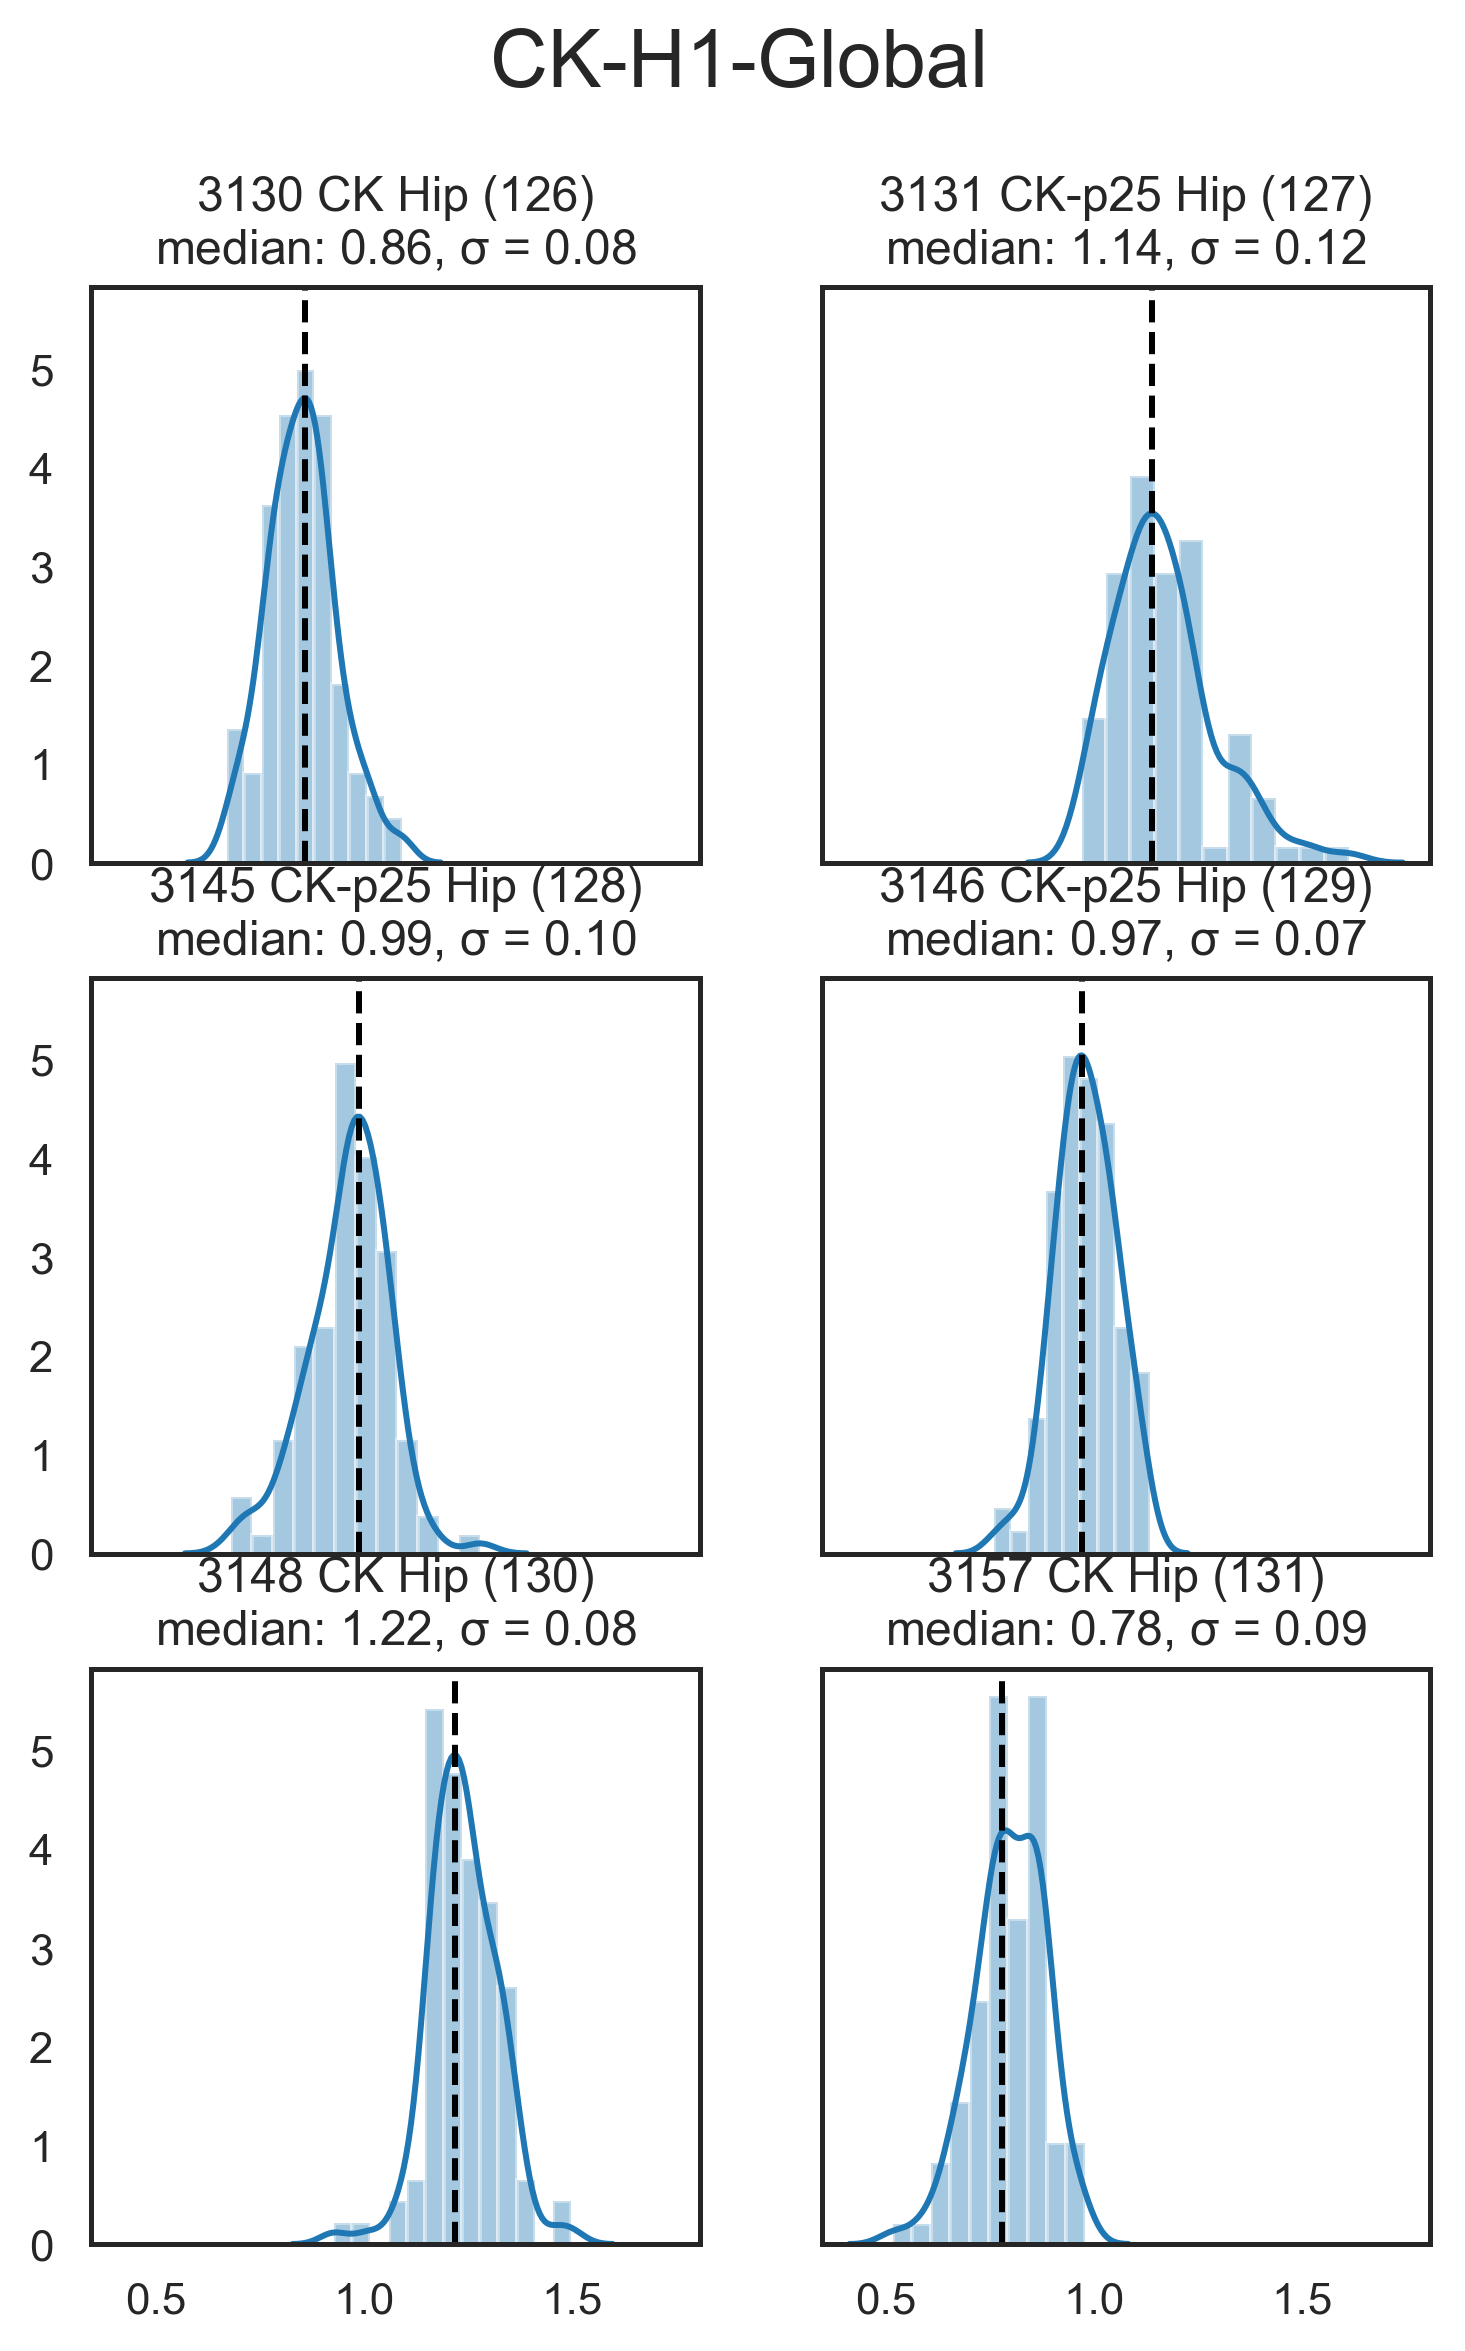

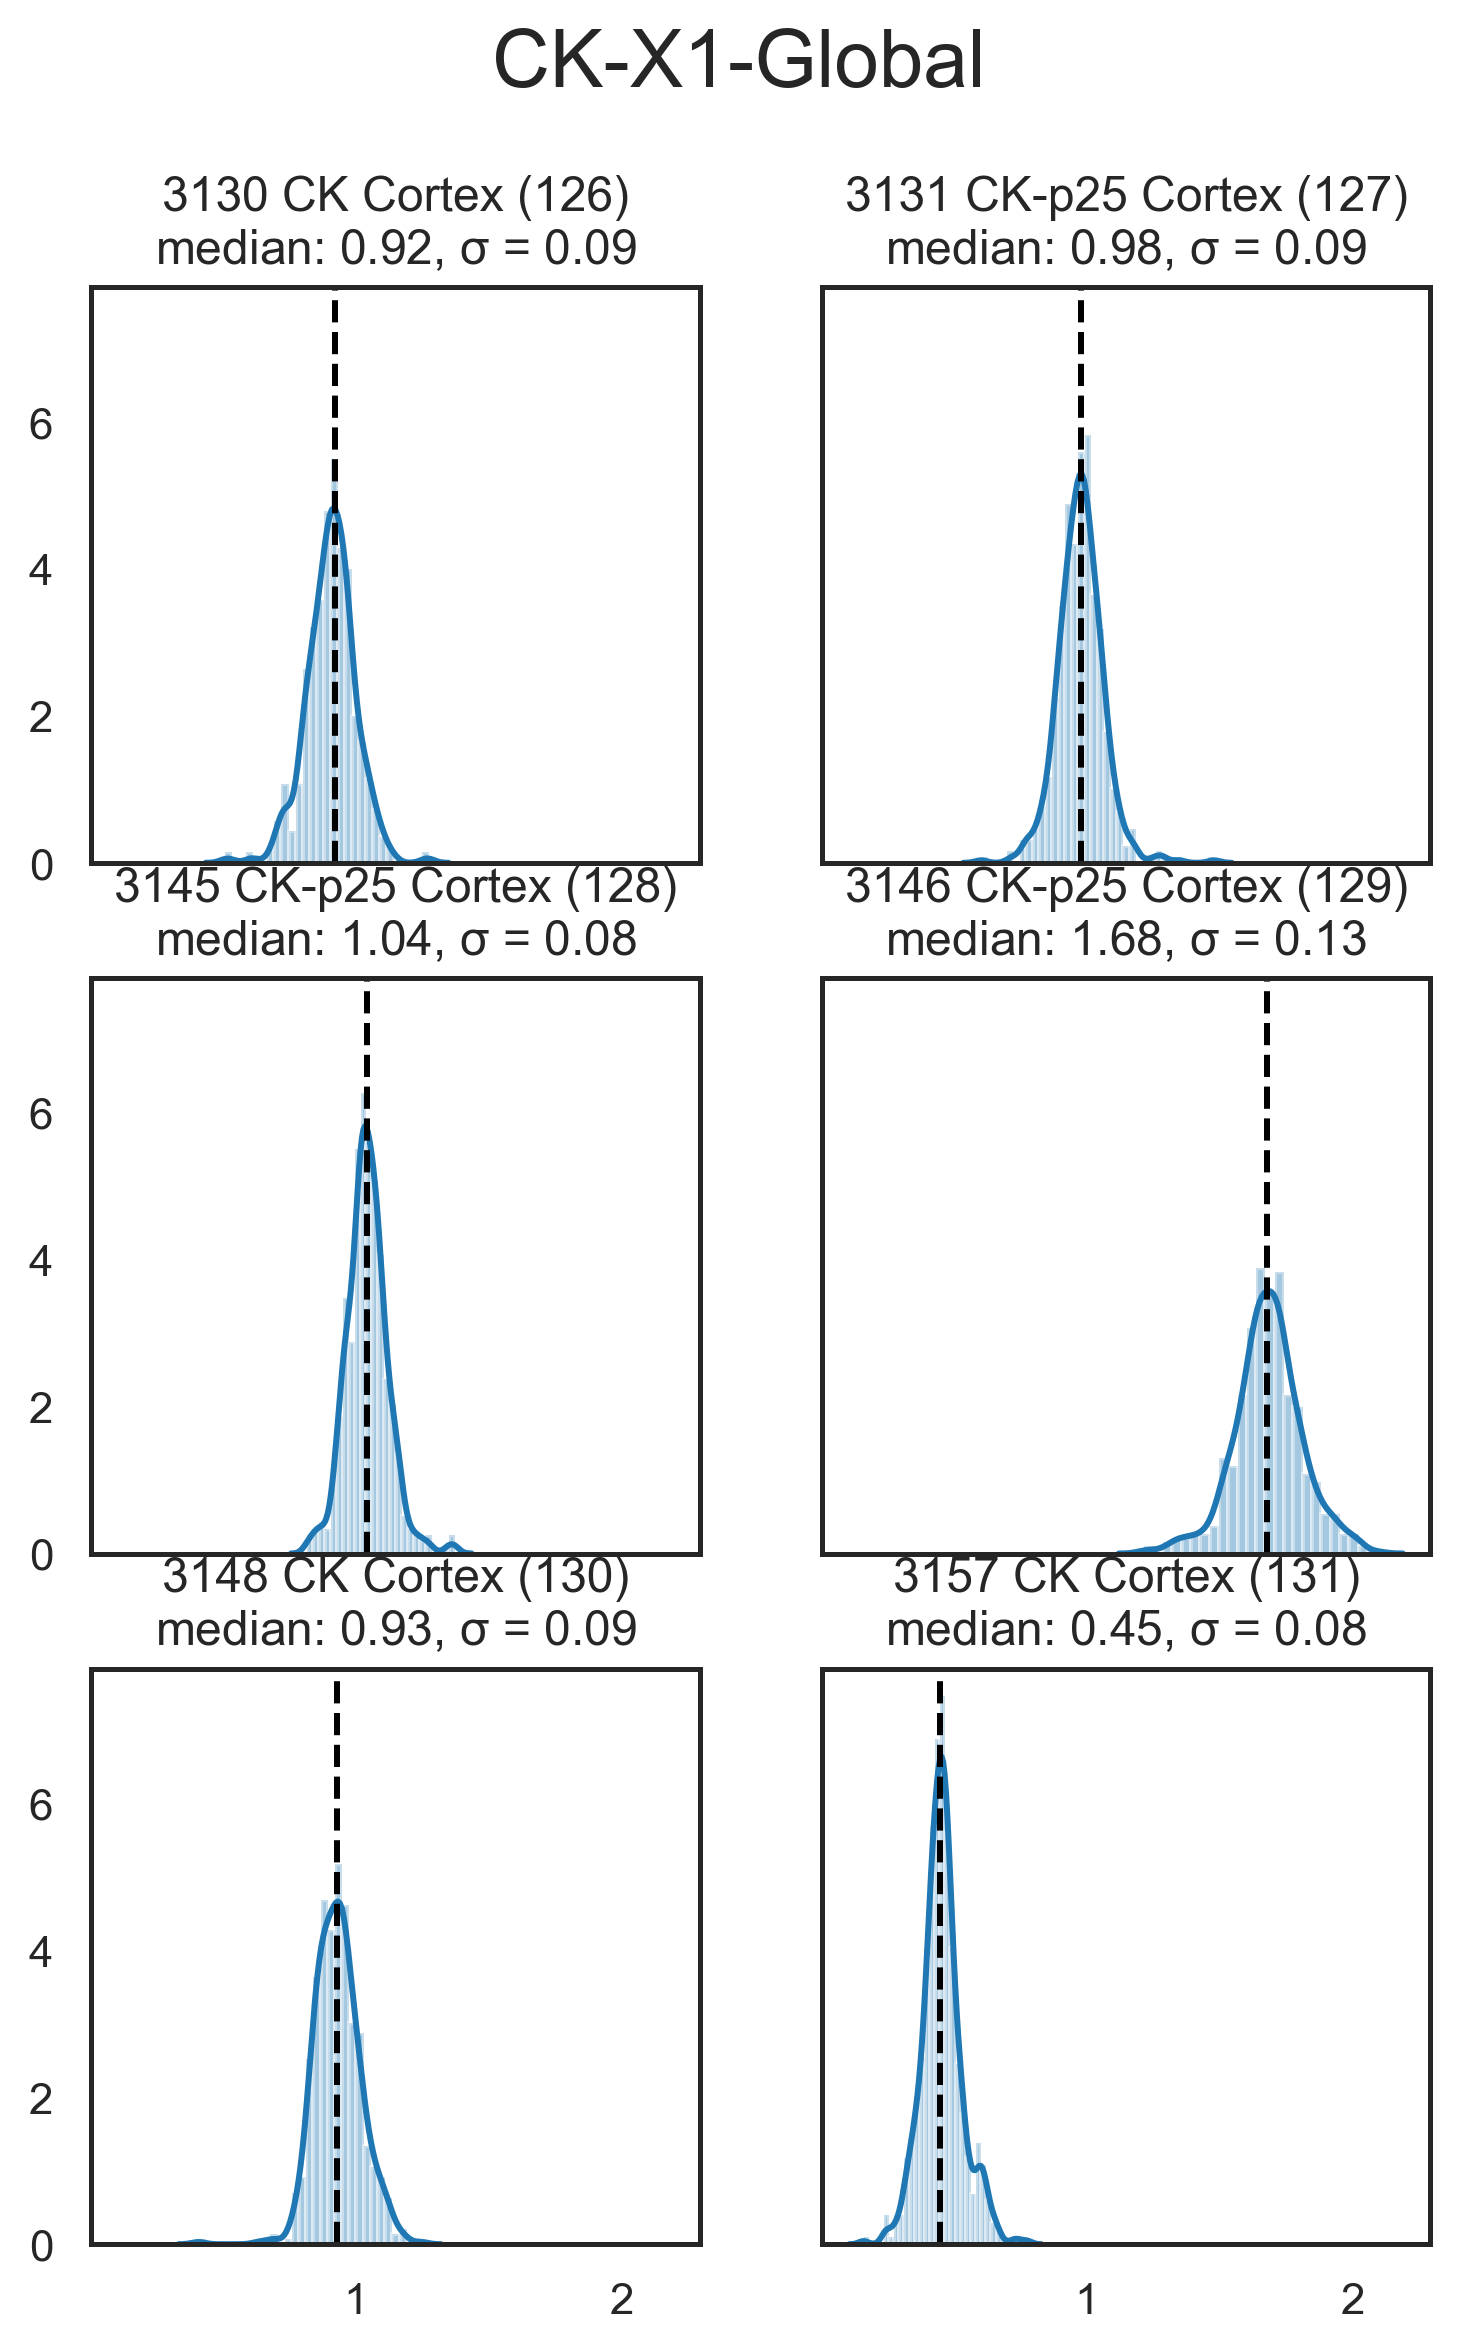

In [3]:
from pyproteome import *
%import_all

ckh_channels = OrderedDict(
    [
        ("3130 CK Hip",     "126"),
        ("3131 CK-p25 Hip", "127"),
        ("3145 CK-p25 Hip", "128"),
        ("3146 CK-p25 Hip", "129"),
        ("3148 CK Hip",     "130"),
        ("3157 CK Hip",     "131"),
    ]
)
ckx_channels = OrderedDict(
    [
        ("3130 CK Cortex",     "126"),
        ("3131 CK-p25 Cortex", "127"),
        ("3145 CK-p25 Cortex", "128"),
        ("3146 CK-p25 Cortex", "129"),
        ("3148 CK Cortex",     "130"),
        ("3157 CK Cortex",     "131"),
    ]
)
ckp25_groups = OrderedDict(
    [
        (
            "CK",
            [
                "3130 CK Hip",
                "3148 CK Hip",
                "3157 CK Hip",
                "3130 CK Cortex",
                "3148 CK Cortex",
                "3157 CK Cortex",
            ],
        ),
        (
            "CK-p25",
            [
                "3131 CK-p25 Hip",
                "3145 CK-p25 Hip",
                "3146 CK-p25 Hip",
                "3131 CK-p25 Cortex",
                "3145 CK-p25 Cortex",
                "3146 CK-p25 Cortex",
            ],
        ),
    ]
)
# With search data located as follows:
#   Searched/
#       CK-H1-pY.msf
#       CK-H1-pST.msf
#       CK-H1-Global.msf
#       CK-X1-pY.msf
#       CK-X1-pST.msf
#       CK-X1-Global.msf
datas = data_sets.load_all_data(
    chan_mapping={
        "CK-H": ckh_channels,
        "CK-X": ckx_channels,
    },
    # Normalize pY, pST, and Global runs to each sample's global data
    norm_mapping=OrderedDict([
        ("CK-H1", "CK-H1-Global"),
        ("CK-X1", "CK-X1-Global"),
    ]),
    # Merge together normalized hippocampus and cortex runs
    merge_mapping=OrderedDict([
        ("CK Hip", ["CK-H1-pY", "CK-H1-pST", "CK-H1-Global"]),
        ("CK Cortex", ["CK-X1-pY", "CK-X1-pST", "CK-X1-Global"]),
        ("CK All", ["CK Hip", "CK Cortex"]),
    ]),
    groups=ckp25_groups,
)

for name in ["CK Hip", "CK Cortex", "CK All"]:
     print("{}: {}".format(name, datas[name].shape))
